In [ ]:
import requests
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt




url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
if response.status_code != 200:
    raise Exception(f"Failed to fetch page: {response.status_code} {response.reason}")

html = response.content


soup = BeautifulSoup(html, "html.parser")


tables = soup.find_all("table")


desired_table = None
header_row = None
rows = None

for table in tables:
    rows = table.find_all("tr")
    header_row = [cell.text.strip() for cell in rows[0].find_all("th")]
    if "Date" in header_row and "Prison name" in header_row:
        desired_table = table
        break


data = []
for row in rows[1:]:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)


print("Header:")
print(header_row, "\n")
print("First 2 rows of Data:")
for row in data[:2]:
    print(row)


df = pd.DataFrame(data, columns=header_row)

df.to_csv('prison.csv')

Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'] 

First 2 rows of Data:
['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[10] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[10] The escape is told in a book, The 10-Second J

In [56]:

df = df.drop("Details", axis=1)


pd.set_option('display.max_colwidth', 30)

print(df[:3])

               Date                    Prison name        Country Succeeded  \
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes   
1  October 31, 1973          Mountjoy Jail, Dublin        Ireland       Yes   
2      May 24, 1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David Kaplan\nCarlos ...  
1  JB O'HaganSeamus TwomeyKev...  
2  Garrett Brock TrapnellMart...  


In [57]:
## Temporal Analysis


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
escapes_per_year = df.groupby('Year').size()
print("Prison Escapes per Year:")
print(escapes_per_year)

Prison Escapes per Year:
Year
1971.0    1
1973.0    1
1978.0    1
1981.0    2
1985.0    2
1986.0    3
1987.0    1
1988.0    3
1989.0    2
1990.0    1
1991.0    1
1992.0    1
1993.0    1
1996.0    1
1997.0    1
1999.0    1
2000.0    2
2001.0    3
2002.0    2
2003.0    1
2005.0    1
2006.0    1
2007.0    3
2009.0    3
2010.0    1
2012.0    1
2013.0    2
2014.0    1
2016.0    1
2018.0    1
2020.0    1
dtype: int64


In [58]:
## code to get only integer years from the 'Date' column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df = df.dropna(subset=['Date'])


df['Year'] = df['Date'].dt.year.astype(int)


escapes_per_year = df.groupby('Year').size()


print("Prison Escapes per Year:")
print(escapes_per_year)

Prison Escapes per Year:
Year
1971    1
1973    1
1978    1
1981    2
1985    2
1986    3
1987    1
1988    3
1989    2
1990    1
1991    1
1992    1
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    1
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1
dtype: int64


In [59]:
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year')


<Axes: title={'center': 'Prison Escapes per Year'}, xlabel='Year', ylabel='Number of Escapes'>

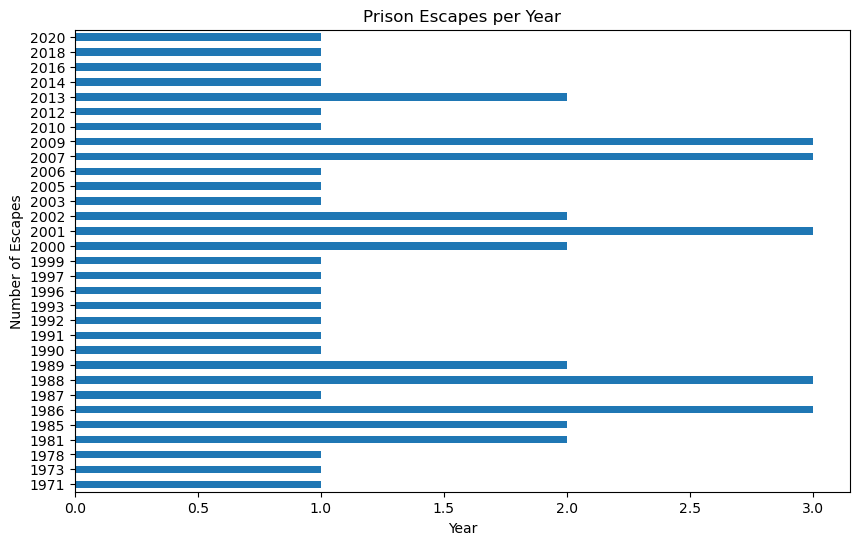

In [71]:
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year')

plt.show()

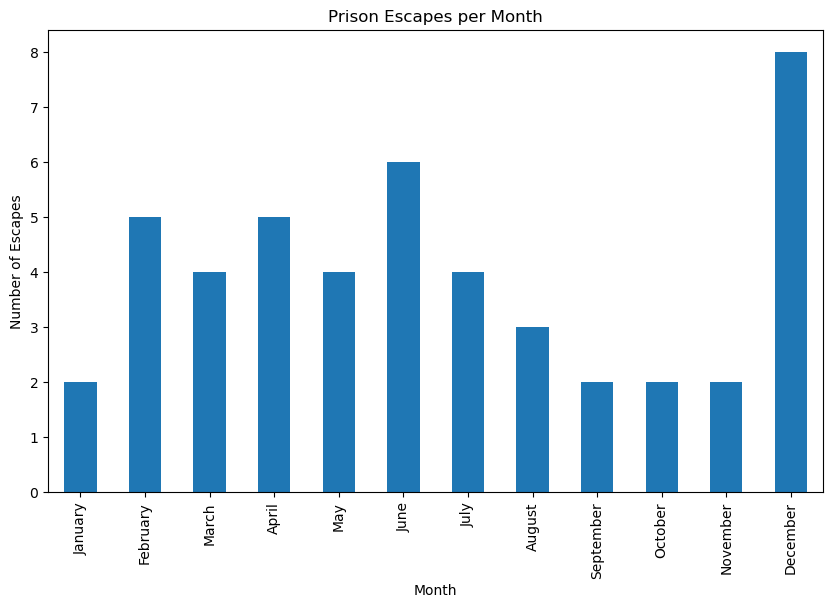

In [61]:

df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek


month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}


escapes_per_month = df.groupby('Month').size()


escapes_per_month = escapes_per_month.rename(index=month_names) 
escapes_per_month.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                       title='Prison Escapes per Month')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

escapes_per_day = df.groupby('DayOfWeek').size()

plt.show()



In [62]:
## Geographical Analysis


escapes_per_country = df.groupby('Country').size()


top_countries = escapes_per_country.sort_values(ascending=False)


print("Countries with the Highest Number of Recorded Prison Escapes:")
print(top_countries.head(10))


Countries with the Highest Number of Recorded Prison Escapes:
Country
France            13
United States      8
Greece             4
Belgium            4
Canada             4
Colombia           2
United Kingdom     2
Brazil             2
Chile              1
Australia          1
dtype: int64


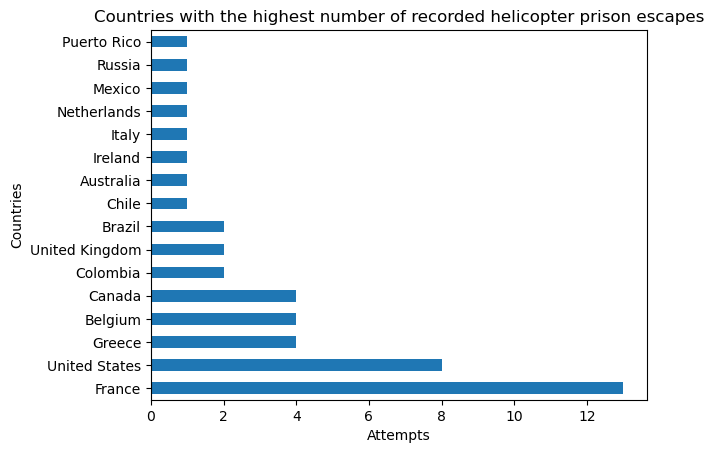

In [70]:
top_countries.plot(kind='barh')
plt.title('Countries with the highest number of recorded helicopter prison escapes')
plt.xlabel('Attempts')
plt.ylabel('Countries')
plt.show()

In [64]:
## sucessful escape analysis

successful_escapes = df[df['Succeeded'] == 'Yes']
successful_escapes_per_country = successful_escapes.groupby('Country').size()

print("Countries with the Highest Number of Successful Prison Escapes:")
print(successful_escapes_per_country.sort_values(ascending=False).head(10))



Countries with the Highest Number of Successful Prison Escapes:
Country
France           11
United States     6
Canada            3
Colombia          2
Brazil            2
Greece            2
Belgium           2
Chile             1
Australia         1
Italy             1
dtype: int64


In [65]:
success = df['Succeeded'].value_counts().get('Yes', 0)
failure = df['Succeeded'].value_counts().get('No', 0)
total = success + failure

success_percentage = (success / total) * 100 if total > 0 else 0
failure_percentage = (failure / total) * 100 if total > 0 else 0

print(f"Total: {total}\nSuccess: {success} ({success_percentage:.2f}%)\nFailure: {failure} ({failure_percentage:.2f}%)")

Total: 47
Success: 36 (76.60%)
Failure: 11 (23.40%)


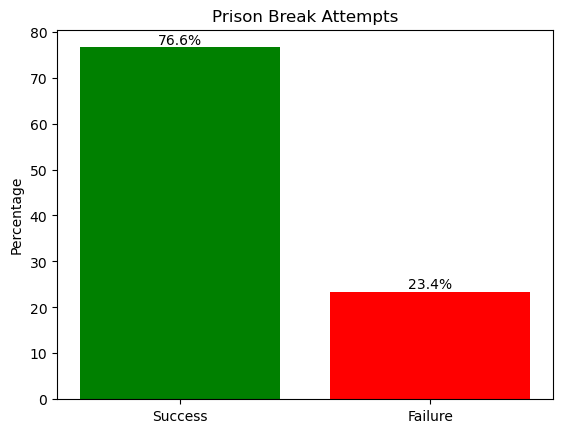

In [66]:

labels = ['Success', 'Failure']
sizes = [success_percentage, failure_percentage]
colors = ['green', 'red']

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)


for i, v in enumerate(sizes):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='black')

ax.set_title('Prison Break Attempts')
ax.set_ylabel('Percentage')

# Display the chart
plt.show()

In [67]:
average_escapees = df['Escapee(s)'].str.count(',') + 1
average_escapees = average_escapees.mean()
print("Average Number of Escapees per Incident:")
print(f"{average_escapees:.2f}")

Average Number of Escapees per Incident:
1.02


In [68]:

escaped_individuals = df[df['Escapee(s)'].notnull()]
individual_escapees = escaped_individuals['Escapee(s)'].str.split(',')
all_escapees = []
for escapees in individual_escapees:
    all_escapees.extend(escapees)
escapee_counts = pd.Series(all_escapees).value_counts()
persistent_escapees = escapee_counts[escapee_counts > 1]
print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees)

Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
—                 6
Pascal Payet      2
Michel Vaujour    2
Name: count, dtype: int64


In [69]:
pd.set_option('display.max_colwidth', 23)
temporary_df = df.dropna(subset=['Escapee(s)'], inplace=False)
column_order = ['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']
repeated_escapees = persistent_escapees.index.tolist()
duplicated_df = temporary_df[temporary_df['Escapee(s)'].str.contains('|'.join(repeated_escapees))]
duplicated_df = duplicated_df.reindex(columns=column_order)
print("Recurrent Escapees")
print(duplicated_df)

Recurrent Escapees


        Escapee(s) Succeeded             Prison name       Date      Country
8   Michel Vaujour       Yes      Prison de la Santé 1986-05-26       France
14               —       Yes  Cárcel Bellavista, ... 1988-12-23     Colombia
19               —       Yes             Lyon Prison 1992-02-24       France
21  Michel Vaujour        No  Touraine Central Pr... 1993-06-17       France
23               —        No     De Geerhorst prison 1997-09-18  Netherlands
26               —       Yes             Lyon prison 2000-12-13       France
27    Pascal Payet       Yes           Luynes prison 2001-01-19       France
29               —        No          Fresnes prison 2001-05-28       France
30               —       Yes  Parada Neto Peniten... 2002-01-17       Brazil
37    Pascal Payet       Yes           Grasse prison 2007-07-15       France
